# Day 52 — "Dropout, Noise & Implicit Regularization: Why Randomness Improves Generalization"

Noise forces robustness. Dropout is implicit model averaging.


In [1]:
# Ensure repo root is on sys.path for local imports
import sys
from pathlib import Path

repo_root = Path.cwd()
if not (repo_root / "days").exists():
    for parent in Path.cwd().resolve().parents:
        if (parent / "days").exists():
            repo_root = parent
            break

sys.path.insert(0, str(repo_root))
print(f"Using repo root: {repo_root}")


Using repo root: /media/abdul-aziz/sdb7/masters_research/math_course_dlcv


## 1. Dropout Mechanism
Dropout zeroes activations randomly, forcing redundancy and robustness.


In [2]:
import numpy as np

x = np.ones(10)
rng = np.random.default_rng(0)
mask = (rng.random(len(x)) < 0.7).astype(float)
dropped = x * mask / 0.7
print('Mask:', mask)
print('After dropout:', dropped)


Mask: [1. 1. 1. 1. 0. 0. 1. 0. 1. 0.]
After dropout: [1.42857143 1.42857143 1.42857143 1.42857143 0.         0.
 1.42857143 0.         1.42857143 0.        ]


## 2. Noise & Flat Minima
Noise perturbs sharp minima more than flat ones, encouraging robust solutions.


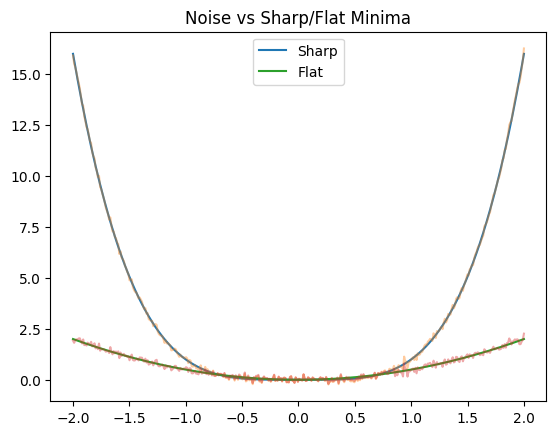

In [3]:
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 400)
sharp = x**4
flat = 0.5 * x**2

noise = 0.1 * np.random.randn(len(x))
plt.plot(x, sharp, label='Sharp')
plt.plot(x, sharp + noise, alpha=0.4)
plt.plot(x, flat, label='Flat')
plt.plot(x, flat + noise, alpha=0.4)
plt.legend()
plt.title('Noise vs Sharp/Flat Minima')
plt.show()


## 3. Reusable Module
```bash
python -m days.day52.code.dropout_noise
```


## 4. Visualization
Run the visualization script to generate plots in `days/day52/outputs/`.


In [4]:
# from days.day52.code.visualizations import main
# main()


## 5. Key Takeaways
- Noise enforces robustness and smooths loss landscapes.
- Dropout is implicit model averaging.
- Randomness biases training toward flatter minima.
